In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

sns.set(style = 'darkgrid')

%matplotlib inline

In [1]:
df = pd.read_excel(r'E:\ETA report\Inbound\Pantos Control-20201006.xlsx'
                   , skiprows = 4, 
                   usecols =['Container/No', 'Shipment No', 'Model', 'B/L Qty','Date', 'Time','GBU','Product','Gap between Demurrage and 200','Destination']
                  
                  )

NameError: name 'pd' is not defined

In [3]:
df

,Shipment No,Container/No,Model,B/L Qty,GBU,Product,Date,Time,Destination,Gap between Demurrage and 200
0,202000005867,TCKU6170140,GSX961MCCZ.AMCQLGU,36,CNT,REF,2020-09-28,18:30:00,Pantos - Coventry,NaN
1,202000005869,TCKU6178789,GSL760PZXV.APZQLGU,18,CNT,REF,2020-09-29,08:30:00,Pantos - Coventry,NaN
2,202000005869,TCKU6178789,GSB760PZXV.APZQLGU,18,CNT,REF,2020-09-29,08:30:00,Pantos - Coventry,NaN
3,202000005607,TCKU6174762,GSX960MCVZ.AMCQLGU,27,CNT,REF,2020-09-30,18:30:00,Pantos - Coventry,NaN
4,202000005607,TCKU6174762,GSX961MCVZ.AMCQLGU,9,CNT,REF,2020-09-30,18:30:00,Pantos - Coventry,NaN
...,...,...,...,...,...,...,...,...,...,...
716,202000007627,MSKU0324601,GSL460ICEV.ADSQLGT,36,CNT,REF,NaT,NaN,NaN,NaN
717,202000007627,MSKU0777090,GSL460ICEV.ADSQLGT,36,CNT,REF,NaT,NaN,NaN,NaN
718,202000007627,PONU8011943,GSL460ICEV.ADSQLGT,36,CNT,REF,NaT,NaN,NaN,NaN
719,202000007627,TCKU6425512,GSL460ICEV.ADSQLGT,36,CNT,REF,NaT,NaN,NaN,NaN


In [7]:
df_key_cbm = pd.read_excel(r'E:\ETA report\Inbound\Key.xlsx', sheet_name='CBM')

In [8]:
Merge1 = df.merge(df_key_cbm, on='Model', how ='left')
Merge1['Total CBM'] = Merge1['B/L Qty'] * Merge1['CBM']

Merge1
Merge1[Merge1["CBM"].isnull()]

,Shipment No,Container/No,Model,B/L Qty,GBU,Product,Date,Time,Destination,Gap between Demurrage and 200,CBM,Total CBM
40,202000006487,MEDU6443689,PL2S.DGBRLLK,120,PNT,AUD,2020-10-02,18:30:00,Pantos - Coventry,NaN,NaN,NaN
41,202000006487,MEDU6443689,PL2B.DGBRLLK,120,PNT,AUD,2020-10-02,18:30:00,Pantos - Coventry,NaN,NaN,NaN
253,202000006900,MSKU0277562,27GN950-B.AEK,250,GTT,MNT,2020-10-14,10:30:00,Pantos - Coventry,NaN,NaN,NaN
540,202000007151,ESSASEL20090250,65WS960H0ZD.AEK,2,GLT,TV,NaT,NaN,NaN,NaN,NaN,NaN
685,202000007123,TCNU9047534,GMX945MC9F.AMCQLGU,20,CNT,REF,NaT,NaN,Pantos - Coventry,NaN,NaN,NaN


In [9]:
df_key_code = pd.read_excel(r'E:\ETA report\Inbound\Key.xlsx', sheet_name='code')


In [10]:
Merge2 = Merge1.merge(df_key_code, on='GBU', how ='left')
Merge2
Merge2[Merge2["DEP"].isnull()]

,Shipment No,Container/No,Model,B/L Qty,GBU,Product,Date,Time,Destination,Gap between Demurrage and 200,CBM,Total CBM,DEP


In [11]:
C_WM = Merge2 [Merge2['DEP'] =='WM' ]
C_REF = Merge2 [Merge2['DEP'] == 'REF' ]
C_MWO= Merge2 [Merge2['DEP'] == 'MWO']
C_RAC= Merge2 [Merge2['DEP'] == 'RAC']
C_CAC= Merge2 [Merge2['DEP'] == 'CAC']
C_SIG= Merge2 [Merge2['DEP'] == 'SIG']
C_TV= Merge2 [Merge2['DEP'] == 'TV']
C_CTV= Merge2 [Merge2['DEP'] == 'CTV']
C_MNT= Merge2 [Merge2['DEP'] == 'MNT']
C_MOB= Merge2 [Merge2['DEP'] == 'MOB']
C_PC= Merge2 [Merge2['DEP'] == 'PC']
C_VS= Merge2 [Merge2['DEP'] == 'VS']
C_PRO= Merge2 [Merge2['DEP'] == 'PRO']
C_AV= Merge2 [Merge2['DEP'] == 'AV']


In [12]:
# Weekly CBM

#WEEK=Merge2.set_index('Date')
#TO =BBC['Total CBM'].resample('W').mean()

CCC_WM=C_WM.set_index('Date')
CCC_REF=C_REF.set_index('Date')
CCC_MWO=C_MWO.set_index('Date')
CCC_RAC=C_RAC.set_index('Date')
CCC_CAC=C_CAC.set_index('Date')
CCC_SIG=C_SIG.set_index('Date')
CCC_TV=C_TV.set_index('Date')
CCC_CTV=C_CTV.set_index('Date')
CCC_MNT=C_MNT.set_index('Date')
CCC_MOB=C_MOB.set_index('Date')
CCC_PC=C_PC.set_index('Date')
CCC_VS=C_VS.set_index('Date')
CCC_PRO=C_PRO.set_index('Date')
CCC_AV=C_AV.set_index('Date')


WMC= CCC_WM['Total CBM'].resample('W').sum()
REFC= CCC_REF['Total CBM'].resample('W').sum()
MWOC= CCC_MWO['Total CBM'].resample('W').sum()
RACC= CCC_RAC['Total CBM'].resample('W').sum()
CACC= CCC_CAC['Total CBM'].resample('W').sum()
SIGC= CCC_SIG['Total CBM'].resample('W').sum()
TVC= CCC_TV['Total CBM'].resample('W').sum()
CTVC= CCC_CTV['Total CBM'].resample('W').sum()
MNTC= CCC_MNT['Total CBM'].resample('W').sum()
MOBC= CCC_MOB['Total CBM'].resample('W').sum()
PCC= CCC_PC['Total CBM'].resample('W').sum()
VSC= CCC_VS['Total CBM'].resample('W').sum()
PROC= CCC_PRO['Total CBM'].resample('W').sum()
AVC= CCC_AV['Total CBM'].resample('W').sum()

WMS = pd.Series(WMC, name="WM")
REFS = pd.Series(REFC, name="REF")
MWOS = pd.Series(MWOC, name="MWO")
RACS = pd.Series(RACC, name="RAC")
CACS = pd.Series(CACC, name="CAC")
SIGS = pd.Series(SIGC, name="SIG")
TVS = pd.Series(TVC, name="TV")
CTVS = pd.Series(CTVC, name="CTV")
MNTS = pd.Series(MNTC, name="MNT")
MOBS = pd.Series(MOBC, name="MOB")
PCS = pd.Series(PCC, name="PC")
VSS = pd.Series(VSC, name="VS")
PROS = pd.Series(PROC, name="PRO")
AVS = pd.Series(AVC, name="AV")

WMS1=WMS.to_frame()
REFS1=REFS.to_frame()
MWOS1=MWOS.to_frame()
RACS1=RACS.to_frame()
CACS1=CACS.to_frame()
SIGS1=SIGS.to_frame()
TVS1=TVS.to_frame()
CTVS1=CTVS.to_frame()
MNTS1=MNTS.to_frame()
MOBS1=MOBS.to_frame()
PCS1=PCS.to_frame()
VSS1=VSS.to_frame()
PROS1=PROS.to_frame()
AVS1=AVS.to_frame()

Wresult = pd.concat ([WMS1, REFS1, MWOS1, RACS1, CACS1, SIGS1, TVS1, CTVS1, MNTS1, MOBS1, PCS1, VSS1, PROS1, AVS1], axis=1, sort=False)

Wresult
Wresult=Wresult.loc['2020-08-03':'2020-09-29']
Wresult

,WM,REF,MWO,RAC,CAC,SIG,TV,CTV,MNT,MOB,PC,VS,PRO,AV
Date,,,,,,,,,,,,,,


,Date,WM,REF,MWO,RAC,CAC,SIG,TV,CTV,MNT,MOB,PC,VS,PRO,AV,SUM
0,2020-09-06,656.337274,947.282864,NaN,NaN,NaN,NaN,9.891460,NaN,217.196070,NaN,NaN,NaN,NaN,385.684055,2216.391723
1,2020-09-13,990.894758,575.607273,NaN,NaN,NaN,NaN,0.000000,NaN,752.542697,NaN,NaN,NaN,NaN,392.834804,2711.879532
2,2020-09-20,740.863120,1120.180036,NaN,NaN,NaN,NaN,275.564216,NaN,486.942077,NaN,NaN,NaN,NaN,316.098385,2939.647834
3,2020-09-27,699.334624,2150.323712,NaN,NaN,NaN,NaN,144.183010,NaN,150.728279,NaN,NaN,NaN,NaN,301.145714,3445.715339


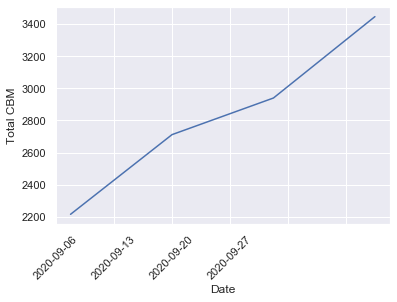

In [16]:
Wresult2= Wresult.reset_index()

Wresult2['Date'] = pd.to_datetime(Wresult2['Date']).dt.normalize()
#sns.lineplot(data=Wresult2 , x='Date', y ='WM',   estimator=sum, ci=None)
#sns.lineplot(data=Wresult2 , x='Date', y ='REF',   estimator=sum, ci=None)
#sns.lineplot(data=Wresult2 , x='Date', y ='WM',   estimator=sum, ci=None)
#sns.lineplot(data=Wresult2 , x='Date', y ='WM',   estimator=sum, ci=None)
#sns.lineplot(data=Wresult2 , x='Date', y ='WM',   estimator=sum, ci=None)
#sns.lineplot(data=Wresult2 , x='Date', y ='WM',   estimator=sum, ci=None)
#sns.lineplot(data=Wresult2 , x='Date', y ='WM',   estimator=sum, ci=None)
#sns.lineplot(data=Wresult2 , x='Date', y ='WM',   estimator=sum, ci=None)

Wresult2['SUM']= Wresult2.sum(axis=1)

#Wresult2.sum(axis=1)
Wresult3 = Wresult2.set_index('Date')

#Wresult4=pd.DataFrame()
#Wresult4['SUM']=Wresult2['SUM']
#Wresult4['Date']=Wresult2['Date']

#TTT= sns.lineplot(x= Wresult.index, y = Wresult2.sum(axis=1))
ax= sns.lineplot(data=Wresult2, x='Date', y='SUM')
#ax.set(xticklabels=[Wresult2['Date']])
ax.set_xticklabels(Wresult3.index.format(), rotation=45)

ax.set_xlim=('2020-04-12','2020-05-10')

#ax.set_xticklabels(Wresult2['Date'], rotation=40)
ax.set_ylabel("Total CBM")

#TICK=Wresult4['Date']
#line = Wresult4.plot.line(x='Date', y='SUM')
#line.set_xticklabels(TICK, rotation=40)
#plt.shows()
#Wresult4
#df_day.index.format()
#Wresult4
#line = Wresult2.plot.line(x='Date', y='SUM')

Wresult2



In [13]:
Wresult2['Date'] = Wresult2['Date'].astype(str)
ax=sns.barplot(data = Wresult2, x='Date', y='SUM')
ax.set_xticklabels(Wresult2['Date'], rotation=45)

NameError: name 'Wresult2' is not defined

In [14]:
DF= Merge2.set_index('Date')

In [15]:
from datetime import datetime, timedelta
D0 = datetime.now()
a = []

for i in range (-1,6):
    b = D0 + timedelta(days = i)
    c= b.strftime("%Y-%m-%d")
    a.append(c)

print(a[-1])


NEXTW= sorted(a)
#print (AAA)
NEXTW

2020-10-11


['2020-10-05',
 '2020-10-06',
 '2020-10-07',
 '2020-10-08',
 '2020-10-09',
 '2020-10-10',
 '2020-10-11']

In [16]:
NEXTW_S = DF.loc[a[0]:a[-1],:]
NEXTW_S1 =NEXTW_S.reset_index()
NEXTW_S1



,Date,Shipment No,Container/No,Model,B/L Qty,GBU,Product,Time,Destination,Gap between Demurrage and 200,CBM,Total CBM,DEP
0,2020-10-05,202000006463,MSDU7953745,HU85LS.AEK,4,GTT,MNT,06:30:00,Pantos - Coventry,NaN,0.037095,0.148380,MNT
1,2020-10-05,202000006463,MSDU7953745,32MN500M-B.AEK,7,GTT,MNT,06:30:00,Pantos - Coventry,NaN,0.062507,0.437549,MNT
2,2020-10-05,202000006463,MSDU7953745,34GN850-B.AEK,10,GTT,MNT,06:30:00,Pantos - Coventry,NaN,0.124964,1.249640,MNT
3,2020-10-05,202000006463,MSDU7953745,34WN80C-B.AEK,90,GTT,MNT,06:30:00,Pantos - Coventry,NaN,0.109964,9.896760,MNT
4,2020-10-05,202000006463,MSDU7953745,27GL83A-B.AEK,50,GTT,MNT,06:30:00,Pantos - Coventry,NaN,0.073143,3.657150,MNT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,2020-10-10,202000006662,MSKU6763793,GSX961NSVZ.ANSQLGU,36,CNT,REF,13:00:00,Dixons - London Gateway,NaN,1.415300,50.950800,REF
131,2020-10-10,202000006377,UETU5096305,GSX961NSVZ.ANSQLGU,36,CNT,REF,14:00:00,Dixons - Bristol,NaN,1.415300,50.950800,REF
132,2020-10-10,202000006543,TCKU6987130,GSJ961NSVV.ANSQLGU,36,CNT,REF,14:00:00,Dixons - London Gateway,NaN,1.415300,50.950800,REF
133,2020-10-11,202000006662,CAXU4684749,GSX961NSVZ.ANSQLGU,36,CNT,REF,15:00:00,AO - Crewe,NaN,1.415300,50.950800,REF


In [17]:
NEXTW_S1.pivot_table(index = ['Date'], columns = 'Product', values= 'Total CBM',aggfunc='sum', fill_value=0, margins=True)

Product,AUD,MNT,REF,TV,WAS,All
Date,,,,,,
2020-10-05 00:00:00,22.549800,113.387313,115.805772,13.04897,61.254072,326.045927
2020-10-06 00:00:00,115.713737,0.000000,204.200760,0.00000,61.641756,381.556253
2020-10-07 00:00:00,0.000000,71.966229,263.081384,0.00000,61.641756,396.689369
2020-10-08 00:00:00,341.309839,0.000000,49.551480,0.00000,0.000000,390.861319
2020-10-09 00:00:00,203.063637,0.000000,294.136083,0.00000,0.000000,497.199720
2020-10-10 00:00:00,19.328400,0.000000,296.236188,0.00000,0.000000,315.564588
2020-10-11 00:00:00,0.000000,0.000000,101.901600,0.00000,0.000000,101.901600
All,701.965413,185.353542,1324.913267,13.04897,184.537584,2409.818776


In [18]:
NEXTW_S1.pivot_table(index = 'Date', columns = 'Destination', values= 'Total CBM',aggfunc='sum', fill_value=0, margins=True)



Destination,AO - Crewe,Bunny,Dixons - Bristol,Dixons - Leeds,Dixons - London Gateway,Dixons - Newark,Marks - Electrical,Pantos - Coventry,RGB,Yusen - MK,All
Date,,,,,,,,,,,
2020-10-05 00:00:00,0.000000,0.0000,13.956624,0.00000,0.0000,27.913248,0.0000,148.986083,0.000000,135.189972,326.045927
2020-10-06 00:00:00,13.956624,0.0000,0.000000,0.00000,0.0000,75.598380,0.0000,115.713737,13.956624,162.330888,381.556253
2020-10-07 00:00:00,48.120200,0.0000,0.000000,0.00000,0.0000,0.000000,101.9016,71.966229,0.000000,174.701340,396.689369
2020-10-08 00:00:00,0.000000,0.0000,0.000000,0.00000,0.0000,0.000000,0.0000,341.309839,0.000000,49.551480,390.861319
2020-10-09 00:00:00,50.950800,101.9016,0.000000,0.00000,0.0000,50.950800,0.0000,203.063637,0.000000,90.332883,497.199720
2020-10-10 00:00:00,0.000000,0.0000,64.907424,13.56894,101.9016,115.858224,0.0000,19.328400,0.000000,0.000000,315.564588
2020-10-11 00:00:00,101.901600,0.0000,0.000000,0.00000,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,101.901600
All,214.929224,101.9016,78.864048,13.56894,101.9016,270.320652,101.9016,900.367925,13.956624,612.106563,2409.818776


In [19]:
AAA=NEXTW_S1.pivot_table(index = ['Destination', 'Product'], columns = 'Date', values= 'Total CBM',aggfunc='sum', fill_value=0, margins=True)
AAA.T

Destination          AO - Crewe     Bunny Dixons - Bristol Dixons - Leeds  \
Product                     REF       REF              REF            REF   
Date                                                                        
2020-10-05 00:00:00    0.000000    0.0000        13.956624        0.00000   
2020-10-06 00:00:00   13.956624    0.0000         0.000000        0.00000   
2020-10-07 00:00:00   48.120200    0.0000         0.000000        0.00000   
2020-10-08 00:00:00    0.000000    0.0000         0.000000        0.00000   
2020-10-09 00:00:00   50.950800  101.9016         0.000000        0.00000   
2020-10-10 00:00:00    0.000000    0.0000        64.907424       13.56894   
2020-10-11 00:00:00  101.901600    0.0000         0.000000        0.00000   
All                  214.929224  101.9016        78.864048       13.56894   

Destination         Dixons - London Gateway Dixons - Newark             \
Product                                 REF             REF        WAS   
Date                                                                     
2020-10-05 00:00:00                  0.0000       27.913248   0.000000   
2020-10-06 00:00:00                  0.0000       13.956624  61.641756   
2020-10-07 00:00:00                  0.0000        0.000000   0.000000   
2020-10-08 00:00:00                  0.0000        0.000000   0.000000   
2020-10-09 00:00:00                  0.0000       50.950800   0.000000   
2020-10-10 00:00:00                101.9016      115.858224   0.000000   
2020-10-11 00:00:00                  0.0000        0.000000   0.000000   
All                                101.9016      208.678896  61.641756   

Destination         Marks - Electrical Pantos - Coventry              \
Product                            REF               AUD         MNT   
Date                                                                   
2020-10-05 00:00:00             0.0000         22.549800  113.387313   
2020-10-06 00:00:00             0.0000        115.713737    0.000000   
2020-10-07 00:00:00           101.9016          0.000000   71.966229   
2020-10-08 00:00:00             0.0000        341.309839    0.000000   
2020-10-09 00:00:00             0.0000        203.063637    0.000000   
2020-10-10 00:00:00             0.0000         19.328400    0.000000   
2020-10-11 00:00:00             0.0000          0.000000    0.000000   
All                           101.9016        701.965413  185.353542   

Destination                          RGB  Yusen - MK                      All  
Product                    TV        REF         REF         WAS               
Date                                                                           
2020-10-05 00:00:00  13.04897   0.000000   73.935900   61.254072   326.045927  
2020-10-06 00:00:00   0.00000  13.956624  162.330888    0.000000   381.556253  
2020-10-07 00:00:00   0.00000   0.000000  113.059584   61.641756   396.689369  
2020-10-08 00:00:00   0.00000   0.000000   49.551480    0.000000   390.861319  
2020-10-09 00:00:00   0.00000   0.000000   90.332883    0.000000   497.199720  
2020-10-10 00:00:00   0.00000   0.000000    0.000000    0.000000   315.564588  
2020-10-11 00:00:00   0.00000   0.000000    0.000000    0.000000   101.901600  
All                  13.04897  13.956624  489.210735  122.895828  2409.818776

Text(0, 0.5, 'Total CBM')

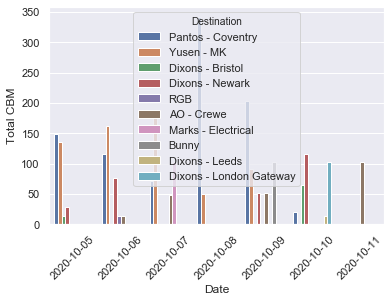

In [20]:
CC_ALL= sns.barplot(data=NEXTW_S1 , x='Date', y ='Total CBM',  hue='Destination',  estimator=sum, ci=None)


CC_ALL.set_xticklabels(NEXTW, rotation=45)
CC_ALL.set_ylabel("Total CBM")

In [21]:
NEXTW_S1.groupby(['Destination']).sum()

,Shipment No,B/L Qty,Gap between Demurrage and 200,CBM,Total CBM
Destination,,,,,
AO - Crewe,1212000038270,178,0.0,6.436568,214.929224
Bunny,404000013328,72,0.0,2.830600,101.901600
Dixons - Bristol,606000019111,108,0.0,2.190668,78.864048
Dixons - Leeds,202000006368,35,0.0,0.387684,13.568940
Dixons - London Gateway,404000013205,72,0.0,2.830600,101.901600
Dixons - Newark,1616000048301,411,0.0,6.184320,270.320652
Marks - Electrical,404000012724,72,0.0,2.830600,101.901600
Pantos - Coventry,14948000490735,20451,0.0,5.930615,900.367925
RGB,202000006367,36,0.0,0.387684,13.956624


In [113]:
DONUT= NEXTW_S1.pivot_table(index = ['Destination'], columns = 'Product', values= 'Total CBM',aggfunc='sum', fill_value=0)
DONUT

Product,AUD,MNT,REF,TV,WAS
Destination,,,,,
CIH - Andover,0.000000,0.000000,0.000000,0.000000,61.641756
CIH - Preston,0.000000,0.000000,0.000000,0.000000,61.641756
Pantos - Coventry,178.629142,175.274984,327.055114,6.029474,523.479132


In [114]:
DI= DONUT.index


In [115]:
#DC= DONUT.columns
DC =[ 'WAS','WAS', 'AUD','MNT','REF','TV','WAS']

In [116]:
DA=DONUT.values
DAA = [61.641756, 61.641756, 178.629142, 175.274984, 327.055114, 6.029474, 523.479132]

#178.629142	117.236192	327.055114	6.029474	523.479132

In [117]:
BIG_value =DA.sum(axis=1)
BIG_value

array([  61.641756 ,   61.641756 , 1210.4678462])

In [129]:
# Libraries
import matplotlib.pyplot as plt
 
# Make data: I have 3 groups and 7 subgroups
group_names=DI
group_size=BIG_value
subgroup_names=DC
subgroup_size=DAA
 
# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds,plt.cm.Greens]
           #plt.cm.Greens, plt.cm.Oranges]
            #plt.cm.Oranges]

 
 # First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=2.0, labels=group_names, colors=[a(0.7), b(0.7),c(0.7)] )
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.95-0.3, labels=subgroup_names, labeldistance=0.7, autopct='%1.1f%%', colors=[a(0.6),b(0.6),c(0.6),c(0.5),c(0.4,c(0.3)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
 
# show it
plt.show()

#autopct='%1.1f%%'

SyntaxError: invalid syntax (<ipython-input-129-3bbe3be11758>, line 23)

In [159]:

from palettable.colorbrewer.qualitative import Pastel1_7

 
# create data
names='groupA', 'groupB', 'groupC', 'groupD',
size=[12,11,3,30]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')

plt.pie(DA, labels=DC, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()



ModuleNotFoundError: No module named 'palettable'